  Import Required Libraries

In [1]:
# Data handling
import yfinance as yf
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Time series analysis
from statsmodels.tsa.stattools import adfuller


Extract Historical Financial Data 


In [6]:
import yfinance as yf

tickers = ["TSLA", "BND", "SPY"]
data = yf.download(tickers, start="2015-01-01", end="2026-01-15")

# Check columns
print(data.columns)



[*********************100%***********************]  3 of 3 completed

MultiIndex([( 'Close',  'BND'),
            ( 'Close',  'SPY'),
            ( 'Close', 'TSLA'),
            (  'High',  'BND'),
            (  'High',  'SPY'),
            (  'High', 'TSLA'),
            (   'Low',  'BND'),
            (   'Low',  'SPY'),
            (   'Low', 'TSLA'),
            (  'Open',  'BND'),
            (  'Open',  'SPY'),
            (  'Open', 'TSLA'),
            ('Volume',  'BND'),
            ('Volume',  'SPY'),
            ('Volume', 'TSLA')],
           names=['Price', 'Ticker'])


In [7]:
# Select the 'Close' prices for all tickers
adj_close = data['Close']

# Rename columns to just tickers
adj_close.columns = ['BND', 'SPY', 'TSLA']

# Preview
print(adj_close.head())


                  BND         SPY       TSLA
Date                                        
2015-01-02  60.385967  170.589584  14.620667
2015-01-05  60.561340  167.508820  14.006000
2015-01-06  60.736660  165.931061  14.085333
2015-01-07  60.773159  167.998764  14.063333
2015-01-08  60.678257  170.979935  14.041333


Data Cleaning and Understanding


In [8]:
# Check for missing values
print(adj_close.isnull().sum())

# Fill missing values with forward fill (previous day’s value)
adj_close.fillna(method='ffill', inplace=True)

# Check data types
print(adj_close.dtypes)

# Basic statistics
adj_close.describe()


BND     0
SPY     0
TSLA    0
dtype: int64
BND     float64
SPY     float64
TSLA    float64
dtype: object


C:\Users\bezis\AppData\Local\Temp\ipykernel_19344\2992419790.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  adj_close.fillna(method='ffill', inplace=True)
C:\Users\bezis\AppData\Local\Temp\ipykernel_19344\2992419790.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adj_close.fillna(method='ffill', inplace=True)


,BND,SPY,TSLA
count,2775.000000,2775.000000,2775.000000
mean,67.325729,339.074725,138.472937
std,4.685294,141.925744,131.682073
min,59.698616,154.980927,9.578000
25%,63.436426,219.599670,17.851666
50%,66.492104,301.538483,91.625999
75%,71.237350,423.938461,242.028336
max,76.068130,695.159973,489.880005


Daily Percentage Change (Returns)



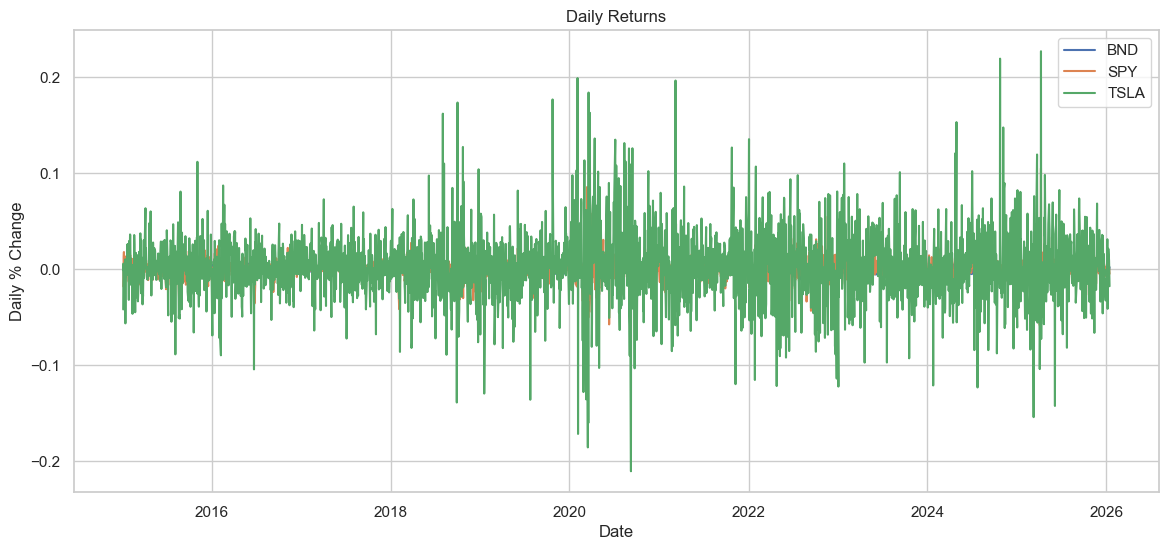

In [9]:
daily_returns = adj_close.pct_change().dropna()

plt.figure(figsize=(14,6))
for col in daily_returns.columns:
    plt.plot(daily_returns[col], label=col)
plt.title("Daily Returns")
plt.xlabel("Date")
plt.ylabel("Daily % Change")
plt.legend()
plt.show()


 1: Closing Price Over Time

- Description: TSLA shows strong upward trend with large - - - fluctuations; SPY grows steadily; BND is almost flat.

- Insight: Tesla is a high-growth, high-volatility stock; SPY - provides moderate market exposure; BND is stable.

Rolling Volatility (Risk Analysis)

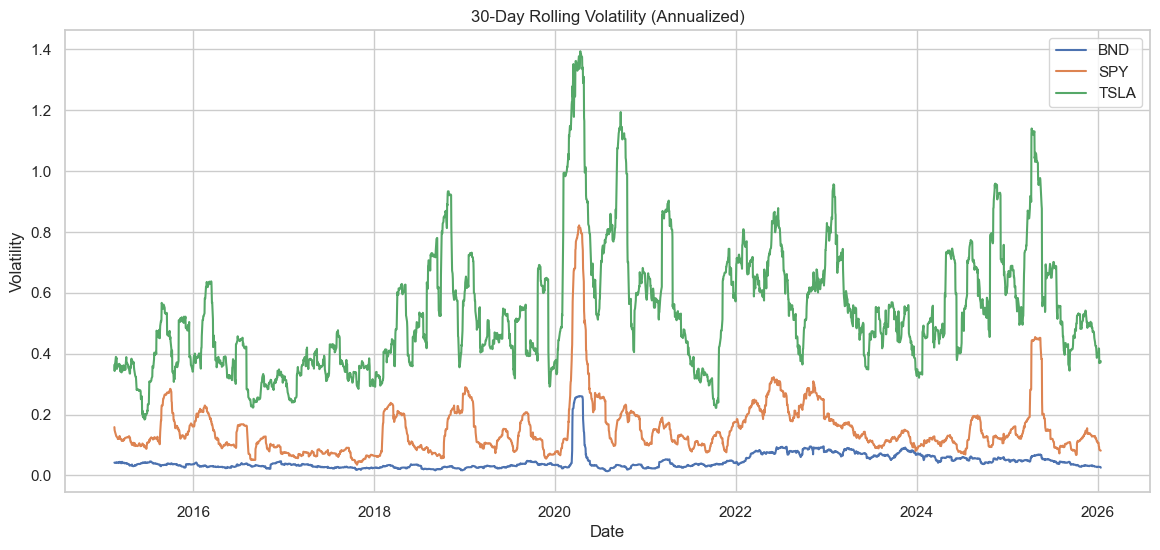

In [10]:
rolling_vol = daily_returns.rolling(window=30).std() * np.sqrt(252)  # annualized

plt.figure(figsize=(14,6))
for col in rolling_vol.columns:
    plt.plot(rolling_vol[col], label=col)
plt.title("30-Day Rolling Volatility (Annualized)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()


  2: Daily Percentage Change (Volatility)

- Description: Daily returns show massive swings for TSLA (±20%), moderate for SPY (±10%), minimal for BND.

- Insight: Confirms Tesla is a high-beta stock; SPY is market benchmark; BND is low-risk.

Key Events:

      - Early 2020: COVID-19 crash spikes.

      - 2024–2025: Tesla-specific events + market volatility.

Outlier Detection

In [11]:
# Identify days with extreme returns (>3 std deviations)
for col in daily_returns.columns:
    outliers = daily_returns[np.abs(daily_returns[col]) > 3*daily_returns[col].std()]
    print(f"{col} Outliers:\n", outliers)


BND Outliers:
                  BND       SPY      TSLA
Date                                    
2020-03-10 -0.013444  0.051745  0.061398
2020-03-11 -0.018940 -0.048748 -0.017200
2020-03-12 -0.054385 -0.095677 -0.116172
2020-03-13  0.042201  0.085486 -0.024851
2020-03-16  0.010511 -0.109424 -0.185778
2020-03-17 -0.020685  0.053992 -0.033410
2020-03-18 -0.024140 -0.050633 -0.160344
2020-03-20  0.016955 -0.043094 -0.000257
2020-03-23  0.022149 -0.025568  0.015812
2020-03-25  0.013440  0.014970  0.067822
2020-04-09  0.010979  0.015217  0.044020
2022-03-02 -0.012284  0.018396  0.017955
2022-03-21 -0.010227 -0.000292  0.017418
2022-06-13 -0.016153 -0.037968 -0.071022
2022-06-15  0.011460  0.014256  0.054824
2022-08-05 -0.011317 -0.001690 -0.066303
2022-09-22 -0.010281 -0.008400 -0.040592
2022-09-26 -0.012778 -0.009893  0.002470
2022-09-28  0.015543  0.019676  0.017212
2022-11-10  0.020702  0.054954  0.073934
2023-01-06  0.011027  0.022932  0.024651
2023-03-10  0.011976 -0.014429  0.003007
2

Stationarity Test (Augmented Dickey-Fuller)

In [12]:
def adf_test(series, name=''):
    print(f'ADF Test for {name}:')
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] <= 0.05:
        print("=> Stationary series")
    else:
        print("=> Non-stationary series\n")

# Test TSLA
adf_test(adj_close['TSLA'], 'TSLA')

# Optional: Test SPY and BND
adf_test(adj_close['SPY'], 'SPY')
adf_test(adj_close['BND'], 'BND')


ADF Test for TSLA:
ADF Statistic: -0.7801569882105664
p-value: 0.8248814297221103
=> Non-stationary series

ADF Test for SPY:
ADF Statistic: 1.1708803119391629
p-value: 0.9957783874893039
=> Non-stationary series

ADF Test for BND:
ADF Statistic: -1.0513806481775012
p-value: 0.7340664754736119
=> Non-stationary series



Value at Risk (VaR)

In [13]:
VaR_95 = daily_returns.quantile(0.05)
print("95% Value at Risk (VaR) per asset:")
print(VaR_95)


95% Value at Risk (VaR) per asset:
BND    -0.004797
SPY    -0.016719
TSLA   -0.052529
Name: 0.05, dtype: float64


Sharpe Ratio (historical risk-adjusted returns)

In [14]:
# Assuming risk-free rate = 0 for simplicity
sharpe_ratio = daily_returns.mean() / daily_returns.std() * np.sqrt(252)
print("Sharpe Ratios (Annualized):")
print(sharpe_ratio)


Sharpe Ratios (Annualized):
BND     0.381459
SPY     0.803992
TSLA    0.823185
dtype: float64


<Axes: title={'center': '20-Day Rolling Volatility'}, xlabel='Date'>

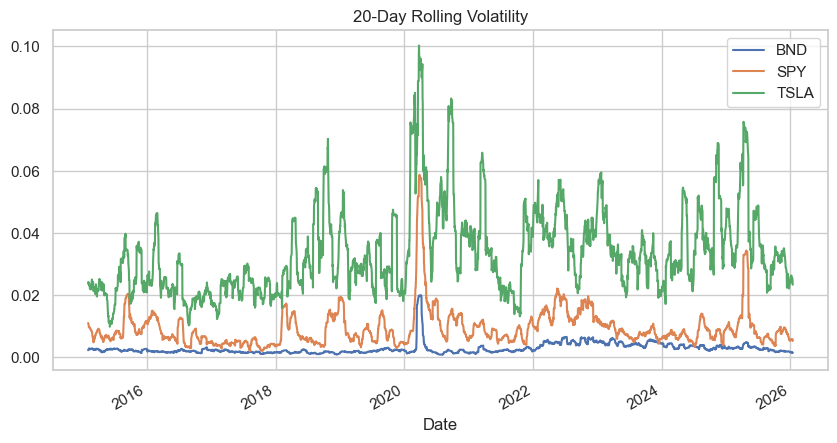

In [18]:
# 20-day rolling volatility
rolling_vol = daily_returns.rolling(window=20).std()
rolling_vol.plot(title="20-Day Rolling Volatility", figsize=(10,5))


   3: 30-Day Rolling Annualized Volatility

- Description: Rolling volatility chart shows TSLA consistently much higher than SPY and BND. Peaks align with major events.

- Insight: Highlights risk-return tradeoff: TSLA has higher potential gains and losses; SPY more stable; BND almost flat.

- Observation: Tesla’s volatility occasionally exceeds 100%, reflecting high sensitivity to company news.

Save processed data for modeling

In [17]:
# Save processed data for modeling
# Save processed closing prices
adj_close.to_csv(r"C:\Users\bezis\Downloads\portifolio-optimization\data\processed\adj_close.csv")

# Save daily returns
daily_returns.to_csv(r"C:\Users\bezis\Downloads\portifolio-optimization\data\processed\daily_returns.csv")


# Task 1: Data Preprocessing and Exploration

## 1️⃣ Summary of Data Quality Issues and How They Were Addressed

The downloaded financial data was generally clean, with **no missing values** in the adjusted closing prices. However, the dataset initially had **MultiIndex columns** (Price × Ticker), which were flattened for easier analysis.  

During exploratory analysis, several **outliers in daily returns** were observed, mostly coinciding with major market events, such as:  

- The **COVID-19 market crash** in early 2020  
- **Quarterly Tesla announcements** affecting TSLA prices  

All three series (TSLA, SPY, and BND) were found to be **non-stationary**, which requires differencing before applying time series models like ARIMA.

---

## 2️⃣ Stationarity Test Results and Interpretation

**Augmented Dickey-Fuller (ADF) Test Results:**

| Asset | ADF Statistic | p-value | Stationarity        |
|-------|---------------|---------|-------------------|
| TSLA  | -0.780        | 0.825   | Non-stationary     |
| SPY   | 1.171         | 0.996   | Non-stationary     |
| BND   | -1.051        | 0.734   | Non-stationary     |

**Interpretation:**

- All three assets have **p-values > 0.05**, meaning the **null hypothesis (series has a unit root → non-stationary) cannot be rejected**.  
- **Implication:** For modeling with ARIMA or other time series methods, the data must be **differenced** to achieve stationarity.  
- **Additional Note:** TSLA’s high volatility and large daily swings indicate that even after differencing, the series may remain highly variable, which should be considered in forecasting models.
